### CARGAR DATA SET NBA 23/24

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nba_url = "https://www.basketball-reference.com/leagues/NBA_2024_per_game.html"
nba_table = pd.read_html(nba_url)


nba = nba_table[0]
nba.head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,...,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,...,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,...,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,...,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,...,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
5,3,Ochai Agbaji,SG,23,UTA,51,10,19.7,2.1,4.9,...,.750,0.7,1.8,2.5,0.9,0.5,0.6,0.7,1.3,5.4
6,3,Ochai Agbaji,SG,23,TOR,27,18,23.6,2.7,6.8,...,.611,1.4,1.9,3.3,1.3,0.7,0.6,1.1,1.9,6.7
7,4,Santi Aldama,PF,23,MEM,61,35,26.5,4.0,9.3,...,.621,1.2,4.6,5.8,2.3,0.7,0.9,1.1,1.5,10.7
8,5,Nickeil Alexander-Walker,SG,25,MIN,82,20,23.4,2.9,6.6,...,.800,0.4,1.6,2.0,2.5,0.8,0.5,0.9,1.7,8.0
9,6,Grayson Allen,SG,28,PHO,75,74,33.5,4.5,9.1,...,.878,0.6,3.3,3.9,3.0,0.9,0.6,1.3,2.1,13.5


In [4]:
nba.shape

(763, 30)

### LIMPIEZA DE NULOS

Hay columnas con nulos, las cuales todas son de porcentaje de tiro, analizando los datos veo que aparece nulo porque estos jugadores no tienen tiros en estos apartado por lo que sustituyo este nulo por 0.0

In [5]:
nba.isnull().sum()

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        8
3P         0
3PA        0
3P%       46
2P         0
2PA        0
2P%       13
eFG%       8
FT         0
FTA        0
FT%       59
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64

In [6]:
pd.set_option("display.max_columns", None)

In [7]:
nba[nba["3P%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
23,18,Udoka Azubuike,C,24,PHO,16,0,7.1,1.0,1.4,.696,0.0,0.0,NaN,1.0,1.4,.696,.696,0.2,0.8,.231,0.7,1.3,2.0,0.2,0.1,0.4,0.3,1.1,2.2
24,19,Ibou Badji,C,21,POR,22,1,10.3,0.6,1.0,.636,0.0,0.0,NaN,0.6,1.0,.636,.636,0.3,0.5,.500,0.9,1.4,2.3,0.6,0.1,0.9,0.7,2.1,1.5
53,36,Darius Bazley,PF,23,PHI,3,0,3.3,0.0,0.3,.000,0.0,0.0,NaN,0.0,0.3,.000,.000,0.0,0.0,NaN,0.0,0.3,0.3,0.7,0.0,0.0,0.3,0.0,0.0
69,46,Bismack Biyombo,C,31,TOT,40,27,19.8,1.9,3.3,.565,0.0,0.0,NaN,1.9,3.3,.565,.565,0.7,1.4,.481,1.6,3.7,5.2,1.3,0.3,0.9,1.1,2.2,4.4
70,46,Bismack Biyombo,C,31,MEM,30,27,23.9,2.2,4.0,.563,0.0,0.0,NaN,2.2,4.0,.563,.563,0.7,1.5,.478,1.9,4.5,6.4,1.7,0.3,1.1,1.3,2.7,5.2
71,46,Bismack Biyombo,C,31,OKC,10,0,7.3,0.7,1.2,.583,0.0,0.0,NaN,0.7,1.2,.583,.583,0.4,0.8,.500,0.5,1.3,1.8,0.2,0.1,0.3,0.4,0.7,1.8
81,53,Marques Bolden,C,25,MIL,2,0,1.5,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0
108,74,Moses Brown,C,24,POR,22,5,9.1,1.5,3.0,.508,0.0,0.0,NaN,1.5,3.0,.508,.508,0.4,1.4,.290,1.7,2.2,3.9,0.3,0.2,0.3,0.5,1.2,3.4
130,91,Colin Castleton,C,23,LAL,16,0,3.7,0.6,1.0,.563,0.0,0.0,NaN,0.6,1.0,.563,.563,0.4,0.4,1.000,0.4,0.4,0.8,0.2,0.1,0.0,0.2,0.7,1.5
131,92,Malcolm Cazalon,SG,22,DET,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
nba["3P%"].fillna(0.0, inplace=True)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_4011/4121698549.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba["3P%"].fillna(0.0, inplace=True)


In [9]:
nba[nba["3P%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [10]:
nba[nba["2P%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
20,15,Ryan Arcidiacono,PG,29,NYK,20,0,2.3,0.0,0.3,.000,0.0,0.3,.000,0.0,0.0,NaN,.000,0.0,0.0,NaN,0.0,0.4,0.4,0.2,0.1,0.0,0.1,0.3,0.0
81,53,Marques Bolden,C,25,MIL,2,0,1.5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.5,0.0
131,92,Malcolm Cazalon,SG,22,DET,1,0,3.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,122,Mamadi Diakite,PF,27,NYK,3,0,2.7,0.0,0.3,.000,0.0,0.3,.000,0.0,0.0,NaN,.000,0.0,0.0,NaN,0.0,0.3,0.3,0.0,0.3,0.0,0.3,0.3,0.0
248,175,Jacob Gilyard,PG,25,BRK,4,0,11.3,0.0,1.5,.000,0.0,1.5,.000,0.0,0.0,NaN,.000,0.0,0.0,NaN,0.3,0.5,0.8,1.5,1.5,0.0,0.3,1.0,0.0
280,201,Ron Harper Jr.,PF,23,TOR,1,0,4.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0
333,246,Justin Jackson,SF,28,MIN,2,0,0.5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
342,254,Trey Jemison,C,24,WAS,2,0,0.5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.0
388,295,Kira Lewis Jr.,PG,22,TOR,1,0,2.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
536,395,Filip Petrušev,C,23,PHI,1,0,3.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
nba["2P%"].fillna(0.0, inplace=True)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_4011/3222797998.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba["2P%"].fillna(0.0, inplace=True)


In [12]:
nba["FG%"].fillna(0.0, inplace=True)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_4011/1771916878.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba["FG%"].fillna(0.0, inplace=True)


In [13]:
nba["FT%"].fillna(0.0, inplace=True)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_4011/2096491128.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba["FT%"].fillna(0.0, inplace=True)


In [14]:
nba["eFG%"].fillna(0.0, inplace=True)

/var/folders/sq/15f1s9nn4hbbfg7k_xnv7wvw0000gp/T/ipykernel_4011/1568842716.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nba["eFG%"].fillna(0.0, inplace=True)


In [15]:
nba[nba["2P%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [16]:
nba[nba["FG%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [17]:
nba[nba["FT%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [18]:
nba[nba["eFG%"].isnull()]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [19]:
nba.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

In [20]:
nba.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [21]:
### ELIMINO FILAS QUE INDICAN LAS COLUMNAS HAY 28, las elimino por medio de la columna Rk

In [22]:
nba.drop(nba[nba["Rk"] == "Rk"].index, inplace = True)

In [23]:
nba

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF-C,24,TOT,74,18,21.9,3.2,6.3,.501,0.4,1.3,.268,2.8,5.0,.562,.529,0.9,1.5,.616,2.6,4.0,6.6,1.3,0.6,0.9,1.1,1.9,7.6
1,1,Precious Achiuwa,C,24,TOR,25,0,17.5,3.1,6.8,.459,0.5,1.9,.277,2.6,4.9,.528,.497,1.0,1.7,.571,2.0,3.4,5.4,1.8,0.6,0.5,1.2,1.6,7.7
2,1,Precious Achiuwa,PF,24,NYK,49,18,24.2,3.2,6.1,.525,0.3,1.0,.260,2.9,5.1,.578,.547,0.9,1.4,.643,2.9,4.3,7.2,1.1,0.6,1.1,1.1,2.1,7.6
3,2,Bam Adebayo,C,26,MIA,71,71,34.0,7.5,14.3,.521,0.2,0.6,.357,7.3,13.7,.528,.529,4.1,5.5,.755,2.2,8.1,10.4,3.9,1.1,0.9,2.3,2.2,19.3
4,3,Ochai Agbaji,SG,23,TOT,78,28,21.0,2.3,5.6,.411,0.8,2.7,.294,1.5,2.8,.523,.483,0.5,0.7,.661,0.9,1.8,2.8,1.1,0.6,0.6,0.8,1.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758,568,Thaddeus Young,PF,35,PHO,10,0,8.9,1.1,2.1,.524,0.0,0.1,.000,1.1,2.0,.550,.524,0.1,0.3,.333,1.7,1.1,2.8,0.7,0.5,0.2,0.4,1.1,2.3
759,569,Trae Young,PG,25,ATL,54,54,36.0,8.0,18.7,.430,3.2,8.7,.373,4.8,10.0,.479,.516,6.4,7.5,.855,0.4,2.3,2.8,10.8,1.3,0.2,4.4,2.0,25.7
760,570,Omer Yurtseven,C,25,UTA,48,12,11.4,2.1,3.8,.538,0.1,0.5,.208,2.0,3.3,.588,.552,0.4,0.6,.679,1.5,2.8,4.3,0.6,0.2,0.4,0.8,1.1,4.6
761,571,Cody Zeller,C,31,NOP,43,0,7.4,0.6,1.4,.419,0.0,0.1,.333,0.6,1.4,.424,.427,0.5,0.9,.605,1.1,1.5,2.6,0.9,0.2,0.1,0.4,1.0,1.8


In [24]:
#Elimino la columna Rk ya que no me sirve para más
del(nba["Rk"])

### TIPOS DE VARIABLES

Convierto todas las variables categóricas a FLOAT

In [25]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 762
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Player  735 non-null    object
 1   Pos     735 non-null    object
 2   Age     735 non-null    object
 3   Tm      735 non-null    object
 4   G       735 non-null    object
 5   GS      735 non-null    object
 6   MP      735 non-null    object
 7   FG      735 non-null    object
 8   FGA     735 non-null    object
 9   FG%     735 non-null    object
 10  3P      735 non-null    object
 11  3PA     735 non-null    object
 12  3P%     735 non-null    object
 13  2P      735 non-null    object
 14  2PA     735 non-null    object
 15  2P%     735 non-null    object
 16  eFG%    735 non-null    object
 17  FT      735 non-null    object
 18  FTA     735 non-null    object
 19  FT%     735 non-null    object
 20  ORB     735 non-null    object
 21  DRB     735 non-null    object
 22  TRB     735 non-null    object


In [26]:
float_col = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
for i in float_col:
    nba[i] = nba[i].astype(float)

In [27]:
nba.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [28]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 735 entries, 0 to 762
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  735 non-null    object 
 1   Pos     735 non-null    object 
 2   Age     735 non-null    float64
 3   Tm      735 non-null    object 
 4   G       735 non-null    float64
 5   GS      735 non-null    float64
 6   MP      735 non-null    float64
 7   FG      735 non-null    float64
 8   FGA     735 non-null    float64
 9   FG%     735 non-null    float64
 10  3P      735 non-null    float64
 11  3PA     735 non-null    float64
 12  3P%     735 non-null    float64
 13  2P      735 non-null    float64
 14  2PA     735 non-null    float64
 15  2P%     735 non-null    float64
 16  eFG%    735 non-null    float64
 17  FT      735 non-null    float64
 18  FTA     735 non-null    float64
 19  FT%     735 non-null    float64
 20  ORB     735 non-null    float64
 21  DRB     735 non-null    float64
 22  TRB    

Dejo la data base en solo jugadores sub23

In [29]:
nba = nba[nba["Age"] <= 23]

In [30]:
nba.shape

(221, 29)

### PROFILING

In [31]:
from evidently.report import Report
from evidently.metric_preset import RegressionPreset,TargetDriftPreset,DataQualityPreset,DataDriftPreset

regression_performance_report = Report(metrics=[
    DataQualityPreset()
])

regression_performance_report.run(
    current_data=nba,
    reference_data=None)

regression_performance_report.save_html(
    'MVPSUB23.html')

### MVP SUB23

In [32]:
pd.set_option('display.max_columns', None)

Voy a utilizar la ponderación estimada que da la NBA para las estadisticas individuales

In [33]:
nba["MVP"] = (nba['PTS'] * 0.30) + (nba["AST"] * 0.25) + (nba["STL"] * 0.1) + (nba["TRB"] * 0.25) + (nba['BLK'] * 0.1)

colsel_MVP = nba.loc[:, ["Player","Tm","Age","Pos","G","MP", "PTS","AST","FG","FG%","FT%","2P","2P%","3P", "3P%", "STL","TOV","ORB", "DRB", "TRB", "BLK", "MVP"]]
colsel_MVP.sort_values(by = "MVP", ascending=False).head(10)


,Player,Tm,Age,Pos,G,MP,PTS,AST,FG,FG%,FT%,2P,2P%,3P,3P%,STL,TOV,ORB,DRB,TRB,BLK,MVP
31,LaMelo Ball,CHO,22.0,PG,22.0,32.3,23.9,8.0,8.3,0.433,0.865,5.1,0.500,3.2,0.355,1.8,3.8,1.3,3.8,5.1,0.2,10.645
189,Anthony Edwards,MIN,22.0,SG,79.0,35.1,25.9,5.1,9.1,0.461,0.836,6.7,0.515,2.4,0.357,1.3,3.1,0.7,4.8,5.4,0.5,10.575
716,Victor Wembanyama,SAS,20.0,C,71.0,29.7,21.4,3.9,7.8,0.465,0.796,6.0,0.534,1.8,0.325,1.2,3.7,2.3,8.4,10.6,3.6,10.525
431,Tyrese Maxey,PHI,23.0,PG,70.0,37.5,25.9,6.2,9.1,0.450,0.868,6.1,0.501,3.0,0.373,1.0,1.7,0.5,3.2,3.7,0.5,10.395
612,Alperen Sengun,HOU,21.0,C,63.0,32.5,21.1,5.0,8.4,0.537,0.693,7.8,0.567,0.5,0.297,1.2,2.6,2.9,6.4,9.3,0.7,10.095
33,Paolo Banchero,ORL,21.0,PF,80.0,35.0,22.6,5.4,8.0,0.455,0.725,6.5,0.493,1.5,0.339,0.9,3.1,1.0,5.9,6.9,0.6,10.005
274,Tyrese Haliburton,IND,23.0,PG,69.0,32.2,20.1,10.9,7.2,0.477,0.855,4.4,0.595,2.8,0.364,1.2,2.3,0.5,3.4,3.9,0.7,9.920
154,Cade Cunningham,DET,22.0,PG,62.0,33.5,22.7,7.5,8.5,0.449,0.869,6.5,0.487,1.9,0.355,0.9,3.4,0.5,3.8,4.3,0.4,9.890
40,Scottie Barnes,TOR,22.0,SG,60.0,34.9,19.9,6.1,7.5,0.475,0.781,5.8,0.536,1.7,0.341,1.3,2.8,2.4,5.9,8.2,1.5,9.825
742,Zion Williamson,NOP,23.0,PF,70.0,31.5,22.9,5.0,8.9,0.570,0.702,8.8,0.574,0.1,0.333,1.1,2.8,1.7,4.1,5.8,0.7,9.750


### JUGADORES SUB 23 MAS VALIOSOS POR POSICIONES 23/24

Teniendo en cuenta la ponderación que estima la NBA para estadisticas individuales las voy a dividir, 
creando un ranking por posiciones variando el valor a cada variable según la importancia en cada posición

In [34]:
#BASE PROMESA. MOST VALUE U23 POINT GUARD

nba["MV.BA"] = (nba['PTS'] * 0.15) + (nba["FG%"] * 0.1) + (nba["FT%"] * 0.05) + (nba['MP'] * 0.1) + (nba["AST"] * 0.2) + (nba["STL"] * 0.1) - (nba["TOV"] * 0.08) + (nba["TRB"] * 0.05) + (nba['BLK'] * 0.02) + (nba["3P"] * 0.05) + (nba["3P%"] * 0.10)

base_promesa = nba.loc[(nba["Pos"] == "PG") & (nba["MP"] >= 25.0) & (nba["PTS"] >= 5.0) & 
                       (nba["AST"] >= 4.0) & (nba["TOV"] <= 3.8) & (nba["STL"] >= 0.5)]

colsel_BASE = base_promesa.loc[:, ["Player","Tm","Age","Pos","G","MP", "PTS","AST","FG","FG%","FT%","2P","2P%","3P", "3P%", "STL","TOV","ORB", "DRB", "TRB", "BLK", "MV.BA"]].sort_values(by = "MV.BA", ascending=False)
colsel_BASE

,Player,Tm,Age,Pos,G,MP,PTS,AST,FG,FG%,FT%,2P,2P%,3P,3P%,STL,TOV,ORB,DRB,TRB,BLK,MV.BA
431,Tyrese Maxey,PHI,23.0,PG,70.0,37.5,25.9,6.2,9.1,0.450,0.868,6.1,0.501,3.0,0.373,1.0,1.7,0.5,3.2,3.7,0.5,9.30970
31,LaMelo Ball,CHO,22.0,PG,22.0,32.3,23.9,8.0,8.3,0.433,0.865,5.1,0.500,3.2,0.355,1.8,3.8,1.3,3.8,5.1,0.2,8.83205
274,Tyrese Haliburton,IND,23.0,PG,69.0,32.2,20.1,10.9,7.2,0.477,0.855,4.4,0.595,2.8,0.364,1.2,2.3,0.5,3.4,3.9,0.7,8.82685
154,Cade Cunningham,DET,22.0,PG,62.0,33.5,22.7,7.5,8.5,0.449,0.869,6.5,0.487,1.9,0.355,0.9,3.4,0.5,3.8,4.3,0.4,8.51485
719,Coby White,CHI,23.0,PG,79.0,36.5,19.1,5.1,6.8,0.447,0.838,4.2,0.508,2.6,0.376,0.7,2.1,0.6,4.0,4.5,0.2,7.92020
418,Tre Mann,CHO,22.0,PG,28.0,31.0,11.9,5.2,4.5,0.453,0.759,3.1,0.509,1.4,0.364,1.7,2.0,0.6,3.9,4.5,0.1,6.35165
295,Scoot Henderson,POR,19.0,PG,62.0,28.5,14.0,5.4,5.0,0.385,0.819,3.5,0.416,1.4,0.325,0.8,3.4,0.9,2.3,3.1,0.2,6.17895
234,Keyonte George,UTA,20.0,PG,75.0,27.0,13.0,4.4,4.3,0.391,0.848,2.3,0.459,2.0,0.334,0.5,2.5,0.2,2.6,2.8,0.1,5.73690
540,Scotty Pippen Jr.,MEM,23.0,PG,21.0,25.1,12.9,4.7,4.8,0.493,0.745,3.3,0.534,1.4,0.417,1.7,2.7,1.0,2.1,3.2,0.5,5.70725


Text(0.5, 1.0, 'Most Value PG U23')

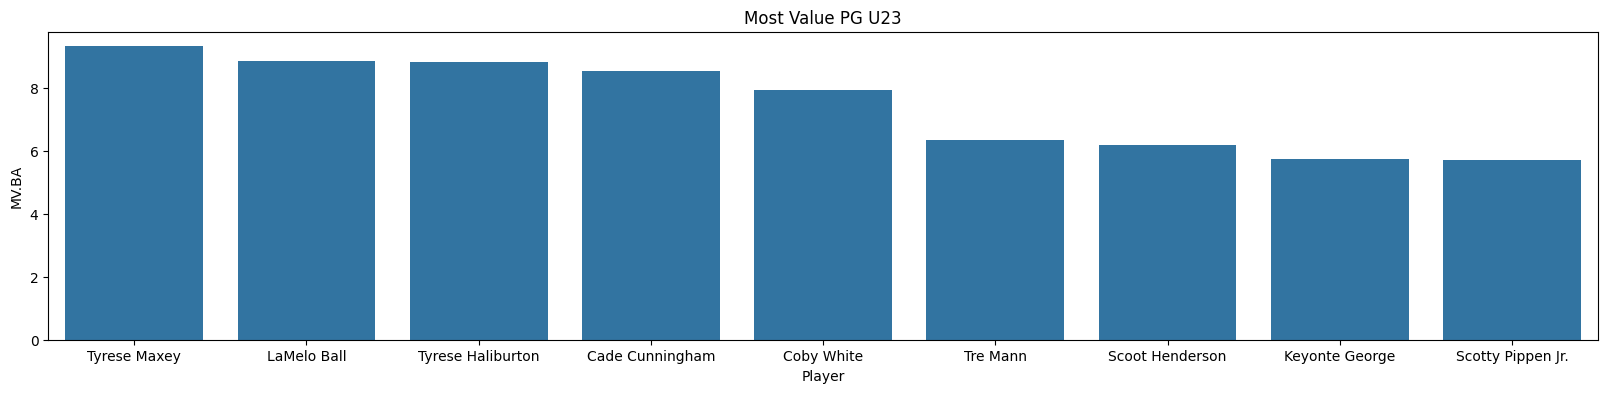

In [35]:
plt.figure(figsize=(20, 4))
sns.barplot(data=colsel_BASE, x='Player', y='MV.BA')
plt.title('Most Value PG U23')

In [36]:
#ESCOLTA-ALERO SHOOTER PROMESA. MOST VALUE U23 SHOOTING GUARD / SMALL FORWARD SHOOTERS 

nba["MV.ES/AL"] = (nba['PTS'] * 0.15) + (nba["FG%"] * 0.1) + (nba["FT%"] * 0.05) + (nba['MP'] * 0.1) + (nba["AST"] * 0.1) + (nba["STL"] * 0.05) - (nba["TOV"] * 0.08)  + (nba["TRB"] * 0.05) + (nba['BLK'] * 0.02) + (nba["3P"] * 0.15) + (nba["3P%"] * 0.15)


esc_alero_promesa = nba.loc[((nba["Pos"] == "SG") | (nba["Pos"] == "SF") | (nba["Pos"] == "SF-SG")) & (nba["MP"] >= 20) & (nba["PTS"] >= 10.0) 
                            & (nba["3P"] >= 1.0) & (nba["3P%"] >= 0.33) & (nba["2P"] >= 3.0) & (nba["2P%"] >= 0.5) & (nba["FT%"] >= 0.7) ]

colsel_ES_AL = esc_alero_promesa.loc[:, ["Player", "Tm", "Age", "Pos", "G","MP", "PTS","AST","FG","FG%","FT%","2P","2P%","3P", "3P%", "STL","TOV","ORB", "DRB", "TRB", "BLK", "eFG%","MV.ES/AL"]].sort_values(by="MV.ES/AL", ascending=False)
colsel_ES_AL

,Player,Tm,Age,Pos,G,MP,PTS,AST,FG,FG%,FT%,2P,2P%,3P,3P%,STL,TOV,ORB,DRB,TRB,BLK,eFG%,MV.ES/AL
189,Anthony Edwards,MIN,22.0,SG,79.0,35.1,25.9,5.1,9.1,0.461,0.836,6.7,0.515,2.4,0.357,1.3,3.1,0.7,4.8,5.4,0.5,0.522,8.50345
40,Scottie Barnes,TOR,22.0,SG,60.0,34.9,19.9,6.1,7.5,0.475,0.781,5.8,0.536,1.7,0.341,1.3,2.8,2.4,5.9,8.2,1.5,0.528,7.75870
688,Devin Vassell,SAS,23.0,SG,68.0,33.1,19.5,4.1,7.3,0.472,0.801,4.9,0.544,2.4,0.372,1.1,1.6,0.4,3.4,3.8,0.3,0.550,7.27105
41,RJ Barrett,TOT,23.0,SG,58.0,31.7,20.2,3.3,7.5,0.495,0.715,6.0,0.549,1.6,0.360,0.5,2.2,0.9,4.5,5.4,0.4,0.547,7.03625
347,Jalen Johnson,ATL,22.0,SF,56.0,33.7,16.0,3.6,6.4,0.511,0.728,5.1,0.574,1.3,0.355,1.2,1.8,1.3,7.4,8.7,0.8,0.562,6.83275
491,Keegan Murray,SAC,23.0,SF,77.0,33.6,15.2,1.7,5.8,0.454,0.831,3.4,0.560,2.4,0.358,1.0,0.8,1.4,4.1,5.5,0.8,0.548,6.58765
21,Deni Avdija,WAS,23.0,SF,75.0,30.1,14.7,3.8,5.4,0.506,0.740,4.2,0.560,1.2,0.374,0.8,2.1,1.1,6.1,7.2,0.5,0.560,6.16070
239,Josh Giddey,OKC,21.0,SG,80.0,25.1,12.3,4.8,5.0,0.475,0.806,4.0,0.530,1.0,0.337,0.6,2.1,1.4,5.0,6.4,0.6,0.523,5.31735
438,Jaden McDaniels,MIN,23.0,SF,72.0,29.2,10.5,1.4,4.3,0.489,0.722,3.1,0.592,1.2,0.337,0.9,1.2,0.8,2.3,3.1,0.6,0.557,5.06655


Text(0.5, 1.0, 'Most Value SG-SF U23')

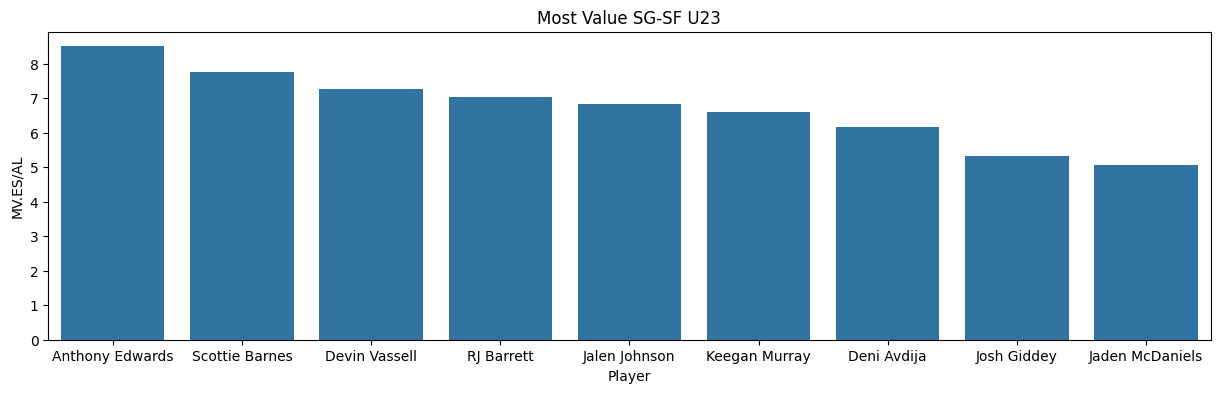

In [37]:
plt.figure(figsize=(15, 4))
sns.barplot(data=colsel_ES_AL, x='Player', y='MV.ES/AL')
plt.title('Most Value SG-SF U23')

In [38]:
#MOST VALUE ALA PIVOT U23

nba["MV.AP"] = (nba['PTS'] * 0.15) + (nba["FG%"] * 0.1) + (nba["FT%"] * 0.05) + (nba['MP'] * 0.15) + (nba["AST"] * 0.05) + (nba["STL"] * 0.05) - (nba["TOV"] * 0.05) + (nba["ORB"] * 0.05) + (nba["DRB"] * 0.05) +(nba["TRB"] * 0.1) + (nba['BLK'] * 0.1) + (nba["3P"] * 0.05) + (nba["3P%"] * 0.05)

AP_promesa = nba.loc[((nba["Pos"] == "PF") | (nba["Pos"] == "C-PF")) & (nba["MP"] >= 20) & (nba["PTS"] >= 10.0) & 
                     (nba["FG"] >= 3.0) & (nba["FG%"] >= 0.4) & (nba["ORB"] >= 1) & 
                     (nba["DRB"] >= 4.0) & (nba["TRB"] >= 5.0) & (nba["BLK"] >= 0.3)]

colsel_AP = AP_promesa.loc[:, ["Player", "Tm", "Age", "Pos", "G","MP", "PTS","AST","FG","FG%","FT%","2P","2P%","3P", "3P%", "STL","TOV","ORB", "DRB", "TRB", "BLK", "MV.AP"]].sort_values(by="MV.AP", ascending=False)
colsel_AP

,Player,Tm,Age,Pos,G,MP,PTS,AST,FG,FG%,FT%,2P,2P%,3P,3P%,STL,TOV,ORB,DRB,TRB,BLK,MV.AP
33,Paolo Banchero,ORL,21.0,PF,80.0,35.0,22.6,5.4,8.0,0.455,0.725,6.5,0.493,1.5,0.339,0.9,3.1,1.0,5.9,6.9,0.6,10.06870
742,Zion Williamson,NOP,23.0,PF,70.0,31.5,22.9,5.0,8.9,0.570,0.702,8.8,0.574,0.1,0.333,1.1,2.8,1.7,4.1,5.8,0.7,9.37875
472,Evan Mobley,CLE,22.0,PF,50.0,30.6,15.7,3.2,6.4,0.580,0.719,6.0,0.604,0.4,0.373,0.9,1.8,2.2,7.1,9.4,1.4,8.73760
635,Jabari Smith Jr.,HOU,20.0,PF,76.0,31.9,13.7,1.6,5.0,0.454,0.811,3.2,0.530,1.8,0.363,0.7,1.2,1.8,6.3,8.1,0.8,8.38410
648,Isaiah Stewart,DET,22.0,PF,46.0,30.9,10.9,1.6,4.0,0.487,0.753,2.6,0.575,1.5,0.383,0.4,1.4,1.6,5.0,6.6,0.8,7.55050
639,Jeremy Sochan,SAS,20.0,PF,74.0,29.6,11.6,3.4,4.6,0.438,0.771,3.6,0.492,0.9,0.308,0.8,1.9,1.9,4.6,6.4,0.5,7.45275
7,Santi Aldama,MEM,23.0,PF,61.0,26.5,10.7,2.3,4.0,0.435,0.621,2.3,0.534,1.7,0.349,0.7,1.1,1.2,4.6,5.8,0.9,6.81200


Text(0.5, 1.0, 'Most Value AP U23')

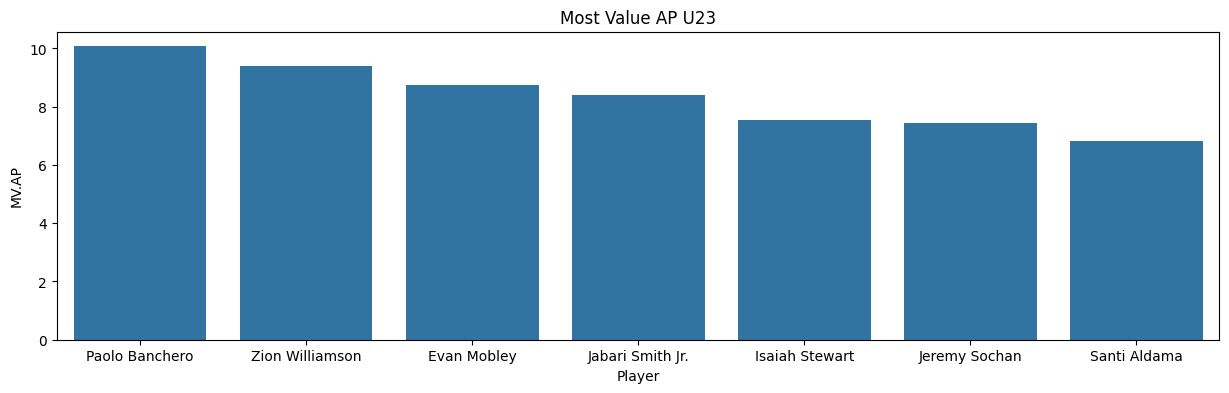

In [39]:
plt.figure(figsize=(15, 4))
sns.barplot(data=colsel_AP, x='Player', y='MV.AP')
plt.title('Most Value AP U23')

In [40]:
#MOST VALUE PIVOT U23

nba["MV.C"] = (nba['PTS'] * 0.15) + (nba["FG%"] * 0.1) + (nba["FT%"] * 0.05) + (nba['MP'] * 0.14) + (nba["AST"] * 0.05) + (nba["STL"] * 0.05) - (nba["TOV"] * 0.05) + (nba["ORB"] * 0.08) + (nba["DRB"] * 0.08) +(nba["TRB"] * 0.1) + (nba['BLK'] * 0.15)

Piv_promesa = nba.loc[((nba["Pos"] == "C") | (nba["Pos"] == "C-PF")) & (nba["MP"] >= 20) & (nba["PTS"] >= 8.0) & 
                      (nba["FG"] >= 3.0) & (nba["FG%"] >= 0.4) & (nba["ORB"] >= 1) & (nba["DRB"] >= 3.5) & (nba["TRB"] >= 6.0) & (nba["BLK"] >= 0.5)]

colsel_PIV = Piv_promesa.loc[:, ["Player", "Tm", "Age", "Pos", "G","MP", "PTS","AST","FG","FG%","FT%","2P","2P%","3P", "3P%", "STL","TOV","ORB", "DRB", "TRB", "BLK", "MV.C"]].sort_values(by="MV.C", ascending=False)
colsel_PIV

,Player,Tm,Age,Pos,G,MP,PTS,AST,FG,FG%,FT%,2P,2P%,3P,3P%,STL,TOV,ORB,DRB,TRB,BLK,MV.C
716,Victor Wembanyama,SAS,20.0,C,71.0,29.7,21.4,3.9,7.8,0.465,0.796,6.0,0.534,1.8,0.325,1.2,3.7,2.3,8.4,10.6,3.6,9.98030
612,Alperen Sengun,HOU,21.0,C,63.0,32.5,21.1,5.0,8.4,0.537,0.693,7.8,0.567,0.5,0.297,1.2,2.6,2.9,6.4,9.3,0.7,9.76235
311,Chet Holmgren,OKC,21.0,C,82.0,29.4,16.5,2.4,6.2,0.530,0.793,4.6,0.623,1.6,0.370,0.6,1.6,1.6,6.3,7.9,2.3,8.52065
187,Jalen Duren,DET,20.0,C,61.0,29.1,13.8,2.4,5.7,0.619,0.790,5.7,0.623,0.0,0.000,0.5,2.1,3.1,8.5,11.6,0.8,8.49340
737,Mark Williams,CHO,22.0,C,19.0,26.7,12.7,1.2,5.2,0.649,0.719,5.2,0.649,0.0,0.000,0.8,0.9,4.0,5.7,9.7,1.1,7.70985
520,Onyeka Okongwu,ATL,23.0,C,55.0,25.5,10.2,1.3,4.1,0.611,0.793,3.6,0.676,0.4,0.333,0.5,0.8,2.6,4.2,6.8,1.1,6.63975
366,Walker Kessler,UTA,22.0,C,64.0,23.3,8.1,0.9,3.6,0.654,0.602,3.5,0.680,0.1,0.211,0.5,1.0,2.6,4.9,7.5,2.4,6.30250
394,Dereck Lively II,DAL,19.0,C,55.0,23.5,8.8,1.1,4.0,0.747,0.506,4.0,0.752,0.0,0.000,0.7,0.9,2.5,4.4,6.9,1.4,6.20700


Text(0.5, 1.0, 'Most Value C U23')

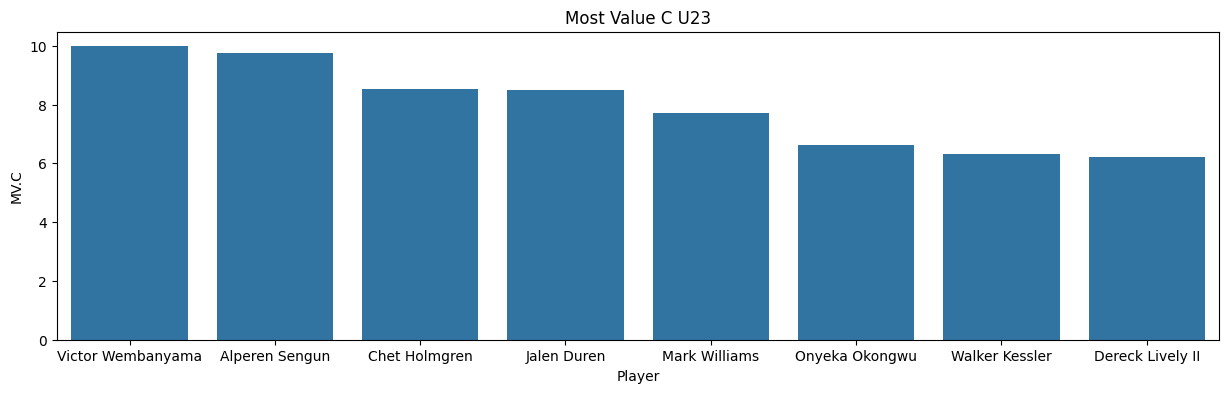

In [41]:
plt.figure(figsize=(15, 4))
sns.barplot(data=colsel_PIV, x='Player', y='MV.C')
plt.title('Most Value C U23')